# <span style="color:blue"> Laboratorio di simulazione numerica (LSN) </span>

## <span style="color:green">  Esercitazione numerica 5</span>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D


### Esercizio 5.1

Lo scopo dell'esercitazione è implementare l'algoritmo di Metropolis per campionare la densità di probabilità della funzione d'onda $|\Psi(\vec{r},t)|^2$ di un elettrone non-relativistico privo di spin di un atomo di idrogeno nel suo ground state ( $\Psi_{1,0,0}(r,\theta,\phi)$ ) e nel suo stato eccitato $2p$ ( $\Psi_{2,1,0}(r,\theta,\phi)$ ) in coordinate cartesiane.

Per prima cosa riporto i grafici delle stime di $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ e $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ con relative incertezze calcolate tramite media a blocchi. I risultati sono espressi in unità di raggio di Bohr ed in funzione del numero di blocchi.

I risultati sono stati ottenuti utilizzando una probabilità di transizione uniforme $T(\vec{x}|\vec{y})$  e scegliendo la lunghezza dello step in modo da ottenere un'accettazione attorno al 50%.
Per la simulazione ho utilizzato $100$ blocchi di $10^4$ step partendo dalla posizione iniziale $(1,1,1)$, inoltre ho eseguito $100$ step di equilibrazione (valore giustificato dopo).

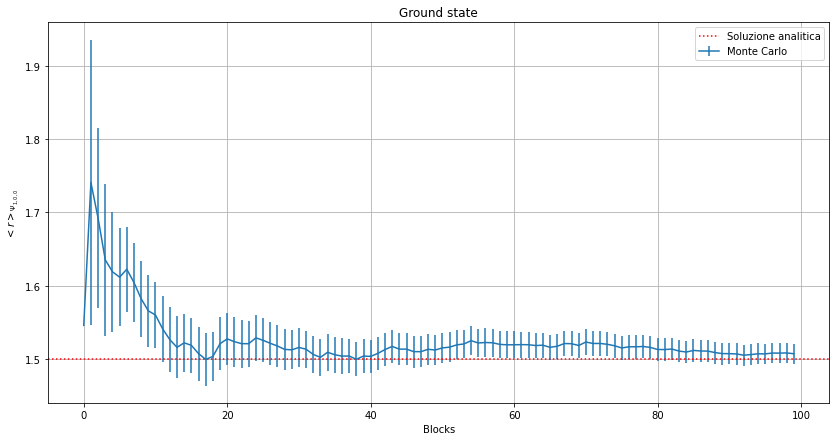

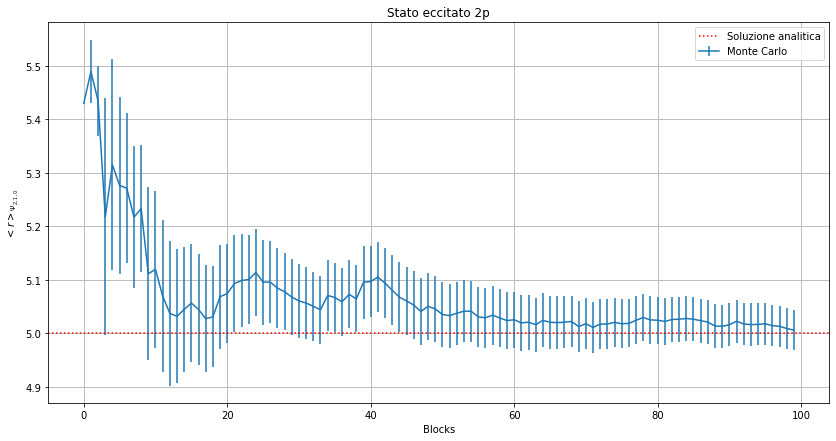

In [4]:
plt.figure(1, figsize = (14, 7))
y_1s, yerr_1s = np.loadtxt("../results/average_radius_100_state.dat", delimiter = " ", unpack = True)
blocks = np.arange(0,100)

plt.title("Ground state")
plt.xlabel('Blocks')
plt.ylabel('$< r >_{\Psi_{1,0,0}}$')
plt.axhline(y=1.5, color='r', linestyle="dotted", label = "Soluzione analitica")
plt.errorbar(blocks, y_1s, yerr_1s, label = "Monte Carlo")
plt.grid(True)
plt.legend()

plt.figure(2, figsize = (14, 7))
y_2p, yerr_2p = np.loadtxt("../results/average_radius_210_state.dat", delimiter = " ", unpack = True)

plt.title("Stato eccitato 2p")
plt.xlabel('Blocks')
plt.ylabel('$< r >_{\Psi_{2,1,0}}$')
plt.axhline(y=5, color='r', linestyle="dotted", label = "Soluzione analitica")
plt.errorbar(blocks, y_2p, yerr_2p, label = "Monte Carlo")
plt.grid(True)
plt.legend()

plt.show()

I risultati ottenuti sembrano compatibili con i valori teorici: $\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0$ e $\left\langle e \right\rangle_{\Psi_{2,1,0}} = 5 a_0$.

Posso quindi mostrare la distribuzione dei punti simulati nello spazio tridimensionale:

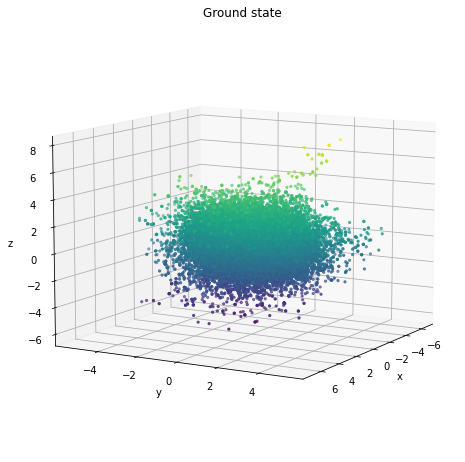

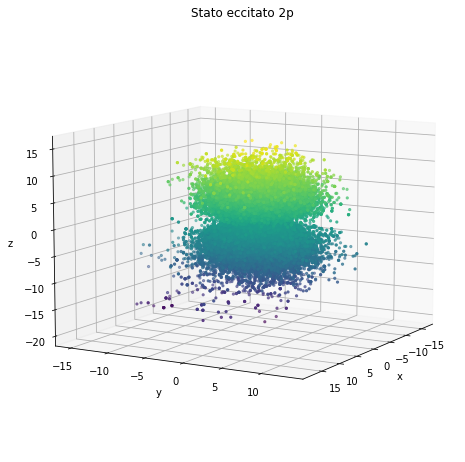

In [5]:
X_1s, Y_1s, Z_1s = np.loadtxt("../results/sampled_points_100_state.dat", delimiter = " ", unpack = True)
X_2p, Y_2p, Z_2p = np.loadtxt("../results/sampled_points_210_state.dat", delimiter = " ", unpack = True)

fig = plt.figure(1, figsize = (9, 6))
ax = Axes3D(fig)
ax.scatter(X_1s, Y_1s, Z_1s, c=Z_1s, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title("Ground state")

fig = plt.figure(2, figsize = (9, 6))
ax = Axes3D(fig)
ax.scatter(X_2p, Y_2p, Z_2p, c=Z_2p, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title("Stato eccitato 2p")

plt.show()

Si vede chiaramente un campionamento spaziale coerente con gli orbitali 1s e 2p.

### Ci chiediamo ora cosa succede se si parte a simulare da un punto lontano dall'origine


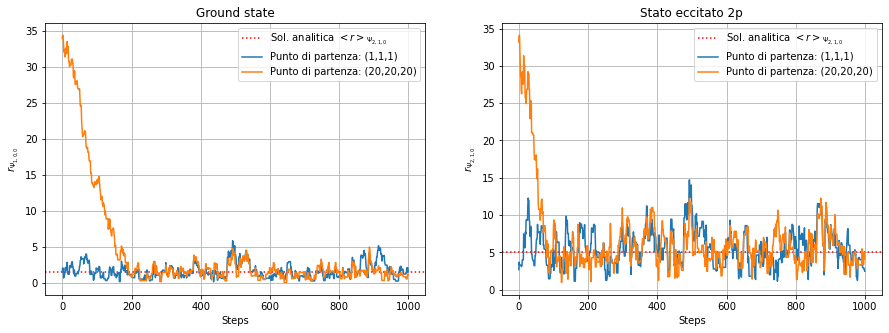

In [6]:
steps = np.arange(0,1000)
y_1s_near = np.loadtxt("../results/test_start_near_from_origin_100_state.dat", delimiter = " ", unpack = True)
y_1s_far = np.loadtxt("../results/test_start_far_from_origin_100_state.dat", delimiter = " ", unpack = True)
y_2p_near = np.loadtxt("../results/test_start_near_from_origin_210_state.dat", delimiter = " ", unpack = True)
y_2p_far = np.loadtxt("../results/test_start_far_from_origin_210_state.dat", delimiter = " ", unpack = True)

plt.figure(figsize=(15,5))
plt.subplot(121)

plt.axhline(y=1.5, color='r', linestyle="dotted", label = "Sol. analitica $< r >_{\Psi_{2,1,0}}$")
plt.plot(steps, y_1s_near, label = "Punto di partenza: (1,1,1)")
plt.plot(steps, y_1s_far, label = "Punto di partenza: (20,20,20)")


plt.title("Ground state")
plt.xlabel('Steps')
plt.ylabel('$ r _{\Psi_{1,0,0}}$')
plt.grid(True)
plt.legend()

plt.subplot(122)

plt.axhline(y=5, color='r', linestyle="dotted", label = "Sol. analitica $< r >_{\Psi_{2,1,0}}$")
plt.plot(steps, y_2p_near, label = "Punto di partenza: (1,1,1)")
plt.plot(steps, y_2p_far, label = "Punto di partenza: (20,20,20)")

plt.title("Stato eccitato 2p")
plt.xlabel('Steps')
plt.ylabel('$ r _{\Psi_{2,1,0}}$')
plt.grid(True)
plt.legend()

plt.show()

Si nota che partendo dal punto più lontano $(20,20,20)$ si ha una fase transiente in cui non c'è equilibrio, praticamente assente quando invece si parte dal punto $(1,1,1)$. Posso quindi assumere che i $100$ step di calibrazione usati nel punto precedente siano perfettamente sufficienti. Nel caso in cui si parta da più lontano è invece necessario prestare attenzione e scegliere un adeguato numero di step di calibrazione.

### Quanti step occorre fare in ogni blocco della simulazione?

Correletion time 1s state =  15.21361222034389
Correletion time 2p state =  9.129960102774795


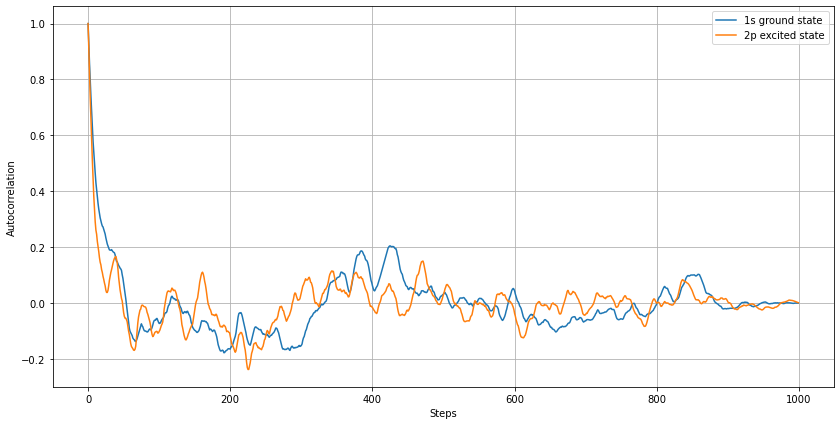

In [7]:
def autocorrelation(series, lag):
    n = len(series)
    mean = 0.
    for x in series:
        mean += x
    mean /= n
    c = 0.
    for i in range(n - lag):
        c += (series[i] - mean)*(series[i + lag] - mean)
    autocovariance = 0.
    for i in range(n):
        autocovariance += (series[i] - mean)*(series[i] - mean)

    return (c / n)/(autocovariance/n)

def exp_fit(t, t0):
    return np.exp(-t / t0)

pos1s = np.loadtxt("../results/test_start_near_from_origin_100_state.dat")
pos2p = np.loadtxt("../results/test_start_near_from_origin_210_state.dat")

corr1s = [autocorrelation(pos1s, t) for t in range(1000)]
corr2p = [autocorrelation(pos2p, t) for t in range(1000)]

plt.figure(1, figsize = (14, 7))

corr_time_1s, var_1s = optimize.curve_fit(exp_fit, np.arange(1000), corr1s)
corr_time_2p, var_2p = optimize.curve_fit(exp_fit, np.arange(1000), corr2p)

plt.plot(corr1s, label="1s ground state")
plt.plot(corr2p, label="2p excited state")
plt.xlabel('Steps')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.legend()

print("Correletion time 1s state = ", corr_time_1s[0])
print("Correletion time 2p state = ", corr_time_2p[0])

Dai dati ottenuti ho calcolato l'autocorrelazione di $r(t)$ e l'ho fittata con una fuzione esponenziale per ottenere il tempo di correlazione della simulazone MC e quindi stimare la grandezza dei blocchi minima da utilizzare nelle simulazioni.
Per il ground state ho ottenuto $ t_{c,\Psi_{1,0,0}} = 10.05$ e per lo stato eccitato $ t_{c,\Psi_{2,1,0}} = 10.79$. 
Questo significa che utilizzando $10^4$ step per blocco avrò un numero di misure indipendenti pari a circa:

In [8]:
n_100 = (1E4)/(2*10.05)
n_210 = (1E4)/(2*10.79)
print('$n_{\Psi_{1,0,0}}$ = ', n_100)
print("$n_{\Psi_{2,1,0}}$ = ", n_210)

$n_{\Psi_{1,0,0}}$ =  497.51243781094524
$n_{\Psi_{2,1,0}}$ =  463.39202965708995
